# Generate HH Fits and Save DF into csv

In [1]:
import pandas as pd
import numpy as np

In [33]:
from brian2 import *
from brian2tools import *

prefs.codegen.target = 'cython'  # weave is not multiprocess-safe!

## Input Data Preparation

In [3]:
# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV
params_correct = {'gl': float(5e-5*siemens*cm**-2 * area),
                  'g_na': float(100*msiemens*cm**-2 * area),
                  'g_kd': float(30*msiemens*cm**-2 * area)}

dt = 0.01*ms

In [4]:
# Generate a step-current input and an "experimental" voltage trace
input_current0 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*10
input_current1 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*2
input_current2 = np.hstack([np.ones(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*2
input_current3 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*50
input_current4 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*0.2

input_current = np.stack((input_current0, input_current1, input_current2, input_current3, input_current4))

In [5]:


defaultclock.dt = dt

In [6]:
# The model
eqsHH = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I(t))/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+ VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
''')

In [7]:
I = TimedArray(input_current0, dt=dt)

G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)
run(20*ms)

voltage = mon.v[0]/mV
voltage += np.random.randn(len(voltage))


inp_trace0 = np.array([input_current0])
n0, n1 = inp_trace0.shape

out_trace0 = np.array(voltage[:n1])

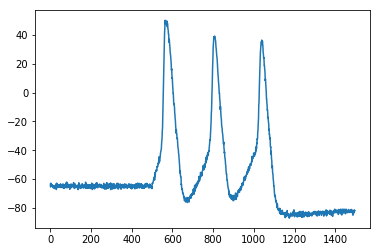

In [8]:
plot(out_trace0);

In [9]:
start_scope()
I = TimedArray(input_current1, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(20*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace1 = np.array([input_current1])
n0, n1 = inp_trace1.shape
out_trace1 = np.array(voltage[:n1])

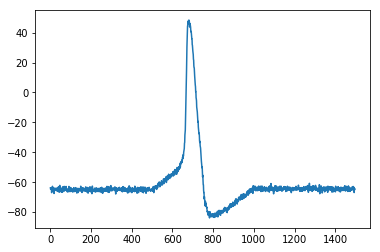

In [10]:
plot(out_trace1);

In [11]:
start_scope()
I = TimedArray(input_current2, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(20*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace2 = np.array([input_current2])
n0, n1 = inp_trace2.shape
out_trace2 = np.array(voltage[:n1])

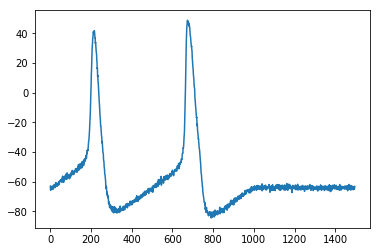

In [12]:
plot(out_trace2);

In [13]:
start_scope()
I = TimedArray(input_current3, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(30*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace3 = np.array([input_current3])
n0, n1 = inp_trace3.shape
out_trace3 = np.array(voltage[:n1])

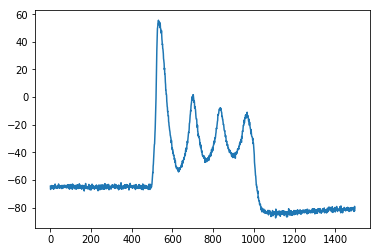

In [14]:
plot(out_trace3);

In [15]:
start_scope()
I = TimedArray(input_current4, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(30*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace4 = np.array([input_current4])
n0, n1 = inp_trace4.shape
out_trace4 = np.array(voltage[:n1])

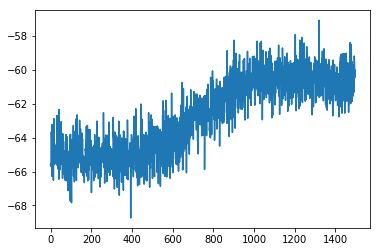

In [16]:
plot(out_trace4);

In [17]:
inp_traces = np.stack((inp_trace0[0], inp_trace1[0], inp_trace2[0], inp_trace3[0], inp_trace4[0]))
np.shape(inp_traces)

(5, 1497)

In [18]:
out_traces = np.stack((out_trace0, out_trace1, out_trace2, out_trace3, out_trace4))
np.shape(out_traces)

(5, 1497)

In [28]:
df_inp = pd.DataFrame(data=inp_traces)
df_out = pd.DataFrame(data=out_traces)

In [30]:
df_inp.to_csv('input_traces_hh.csv')
df_out.to_csv('output_traces_hh.csv')